In [74]:
pip install lazypredict

In [75]:
import pandas as pd

df = pd.read_csv('cannula_data.csv')

print(df)


    No.  Order No.  Article No.  Article Description  Drawing  \
0     1   14389820      15325218              IV0.56   391.10   
1     2   14389217      15325226              IV0.71   384.70   
2     3   14389219      15325226              IV0.71   361.30   
3     4   14389292      16056175              IV0.71   393.80   
4     5   14389300      16056175              IV0.71   375.00   
5     6   14389203      15325218              IV0.56   395.10   
6     7   14389211      15325218              IV0.56   391.60   
7     8   14388570      15325218              IV0.56   392.60   
8     9   14389927      15323759              IV0.91   360.40   
9    10   14389345      15325189              IV0.46   387.40   
10   11   14389829      15325218              IV0.56   394.20   
11   12   14388649      15325220              IV0.71   383.80   
12   13   14389283      16056183              IV0.56   349.00   
13   14   14389863      15325217              IV0.71   375.60   
14   15   14389855      1

In [76]:
df.drop('No.', axis=1, inplace=True)

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
df.shape

(24, 8)

In [79]:
df.head()

,Order No.,Article No.,Article Description,Drawing,Bright Annealing,Sinking,Electro Fission,Distorted or Not
0,14389820,15325218,IV0.56,391.10,99.20,375.60,391.00,1
1,14389217,15325226,IV0.71,384.70,102.60,387.30,390.70,1
2,14389219,15325226,IV0.71,361.30,114.10,383.60,400.00,1
3,14389292,16056175,IV0.71,393.80,117.10,402.40,406.90,1
4,14389300,16056175,IV0.71,375.00,115.60,403.80,407.10,1


In [80]:
print(df)

    Order No.  Article No.  Article Description  Drawing  Bright Annealing  \
0    14389820      15325218              IV0.56   391.10             99.20   
1    14389217      15325226              IV0.71   384.70            102.60   
2    14389219      15325226              IV0.71   361.30            114.10   
3    14389292      16056175              IV0.71   393.80            117.10   
4    14389300      16056175              IV0.71   375.00            115.60   
5    14389203      15325218              IV0.56   395.10             98.90   
6    14389211      15325218              IV0.56   391.60            116.50   
7    14388570      15325218              IV0.56   392.60            115.00   
8    14389927      15323759              IV0.91   360.40            107.40   
9    14389345      15325189              IV0.46   387.40            115.20   
10   14389829      15325218              IV0.56   394.20            108.00   
11   14388649      15325220              IV0.71   383.80        

In [81]:
df['Distorted or Not'].value_counts()

,count
Distorted or Not,
1,12
0,12


In [82]:
df.isnull().sum()

,0
Order No.,0
Article No.,0
Article Description,0
Drawing,0
Bright Annealing,0
Sinking,0
Electro Fission,0
Distorted or Not,0


In [83]:
X = df.drop(['Distorted or Not'], axis=1)

y = df['Distorted or Not']

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [85]:
X_train.shape, X_test.shape

((16, 7), (8, 7))

In [86]:
X_train.dtypes

,0
Order No.,int64
Article No.,int64
Article Description,object
Drawing,float64
Bright Annealing,float64
Sinking,float64
Electro Fission,float64


In [87]:
X_train.head()

,Order No.,Article No.,Article Description,Drawing,Bright Annealing,Sinking,Electro Fission
21,14389216,15325226,IV0.71,398.40,163.80,392.60,413.80
5,14389203,15325218,IV0.56,395.10,98.90,411.80,402.00
2,14389219,15325226,IV0.71,361.30,114.10,383.60,400.00
12,14389283,16056183,IV0.56,349.00,196.70,355.20,363.40
15,14389922,15325222,IV0.91,371.20,174.20,362.40,366.30


In [88]:
pip install category_encoders

In [89]:
import category_encoders as ce

In [90]:
X_test.head()

,Order No.,Article No.,Article Description,Drawing,Bright Annealing,Sinking,Electro Fission
8,14389927,15323759,IV0.91,360.40,107.40,385.60,387.70
16,14389906,15325222,IV0.91,344.10,171.40,340.20,397.40
0,14389820,15325218,IV0.56,391.10,99.20,375.60,391.00
18,14389836,15325221,IV0.56,370.60,165.70,387.90,420.00
11,14388649,15325220,IV0.71,383.80,106.60,387.70,394.10


In [91]:
print(X_train.columns)

Index(['Order No.', 'Article No. ', 'Article Description', 'Drawing',
       'Bright Annealing', 'Sinking', 'Electro Fission'],
      dtype='object')


In [92]:
encoder = ce.OrdinalEncoder(cols=['Article No. ', 'Article Description'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [93]:
X_train.head()

,Order No.,Article No.,Article Description,Drawing,Bright Annealing,Sinking,Electro Fission
21,14389216,1,1,398.40,163.80,392.60,413.80
5,14389203,2,2,395.10,98.90,411.80,402.00
2,14389219,1,1,361.30,114.10,383.60,400.00
12,14389283,3,2,349.00,196.70,355.20,363.40
15,14389922,4,3,371.20,174.20,362.40,366.30


In [94]:
X_train.dtypes

,0
Order No.,int64
Article No.,int64
Article Description,int64
Drawing,float64
Bright Annealing,float64
Sinking,float64
Electro Fission,float64


In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Your Model have accuracy score of : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Your Model have accuracy score of : 1.0000


In [97]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)


print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


In [98]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [99]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
Bright Annealing,0.39
Article No.,0.17
Drawing,0.12
Order No.,0.12
Electro Fission,0.08
Article Description,0.07
Sinking,0.04


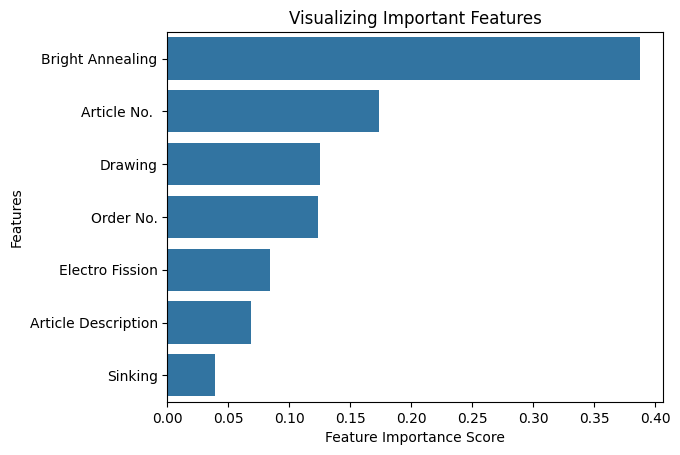

In [100]:
sns.barplot(x=feature_scores, y=feature_scores.index)




plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



plt.title("Visualizing Important Features")


plt.show()

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision Score (for each class)
precision = precision_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"Precision: {precision:.4f}")

# Recall Score (for each class)
recall = recall_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"Recall: {recall:.4f}")

# F1 Score (for each class)
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' for multi-class
print(f"F1 Score: {f1:.4f}")

# Classification Report (includes precision, recall, F1 score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC AUC (only for binary classification tasks)
# You need probability scores for this metric, so you should use the predict_proba() method
# For binary classification:
if len(set(y_test)) == 2:  # Check if the problem is binary classification
    y_prob = rfc.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"\nROC AUC: {roc_auc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Confusion Matrix:
[[3 0]
 [0 5]]

ROC AUC: 1.0000
